# Example implementation of a NN on a Healpix map

In [8]:
import numpy as np
import nnhealpix
import nnhealpix.map_ordering
import nnhealpix.layers.blocks
import healpy as hp
import keras
import matplotlib.pyplot as plt
%matplotlib notebook

In [9]:
Nside=64
m = np.arange(hp.nside2npix(Nside))

## DGrade

In [10]:
mtensor = m.reshape(1, len(m), 1)
shape = (len(m), 1)
inputs = keras.layers.Input(shape)
x = nnhealpix.layers.blocks.Dgrade(Nside, 8)(inputs)
model = keras.models.Model(inputs=inputs, outputs=x)
model.compile(loss=keras.losses.mse,
              optimizer=keras.optimizers.SGD(lr=0.01))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 49152, 1)          0         
_________________________________________________________________
order_map_3 (OrderMap)       (None, 49152, 1)          0         
_________________________________________________________________
average_pooling1d_2 (Average (None, 768, 1)            0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


<IPython.core.display.Javascript object>


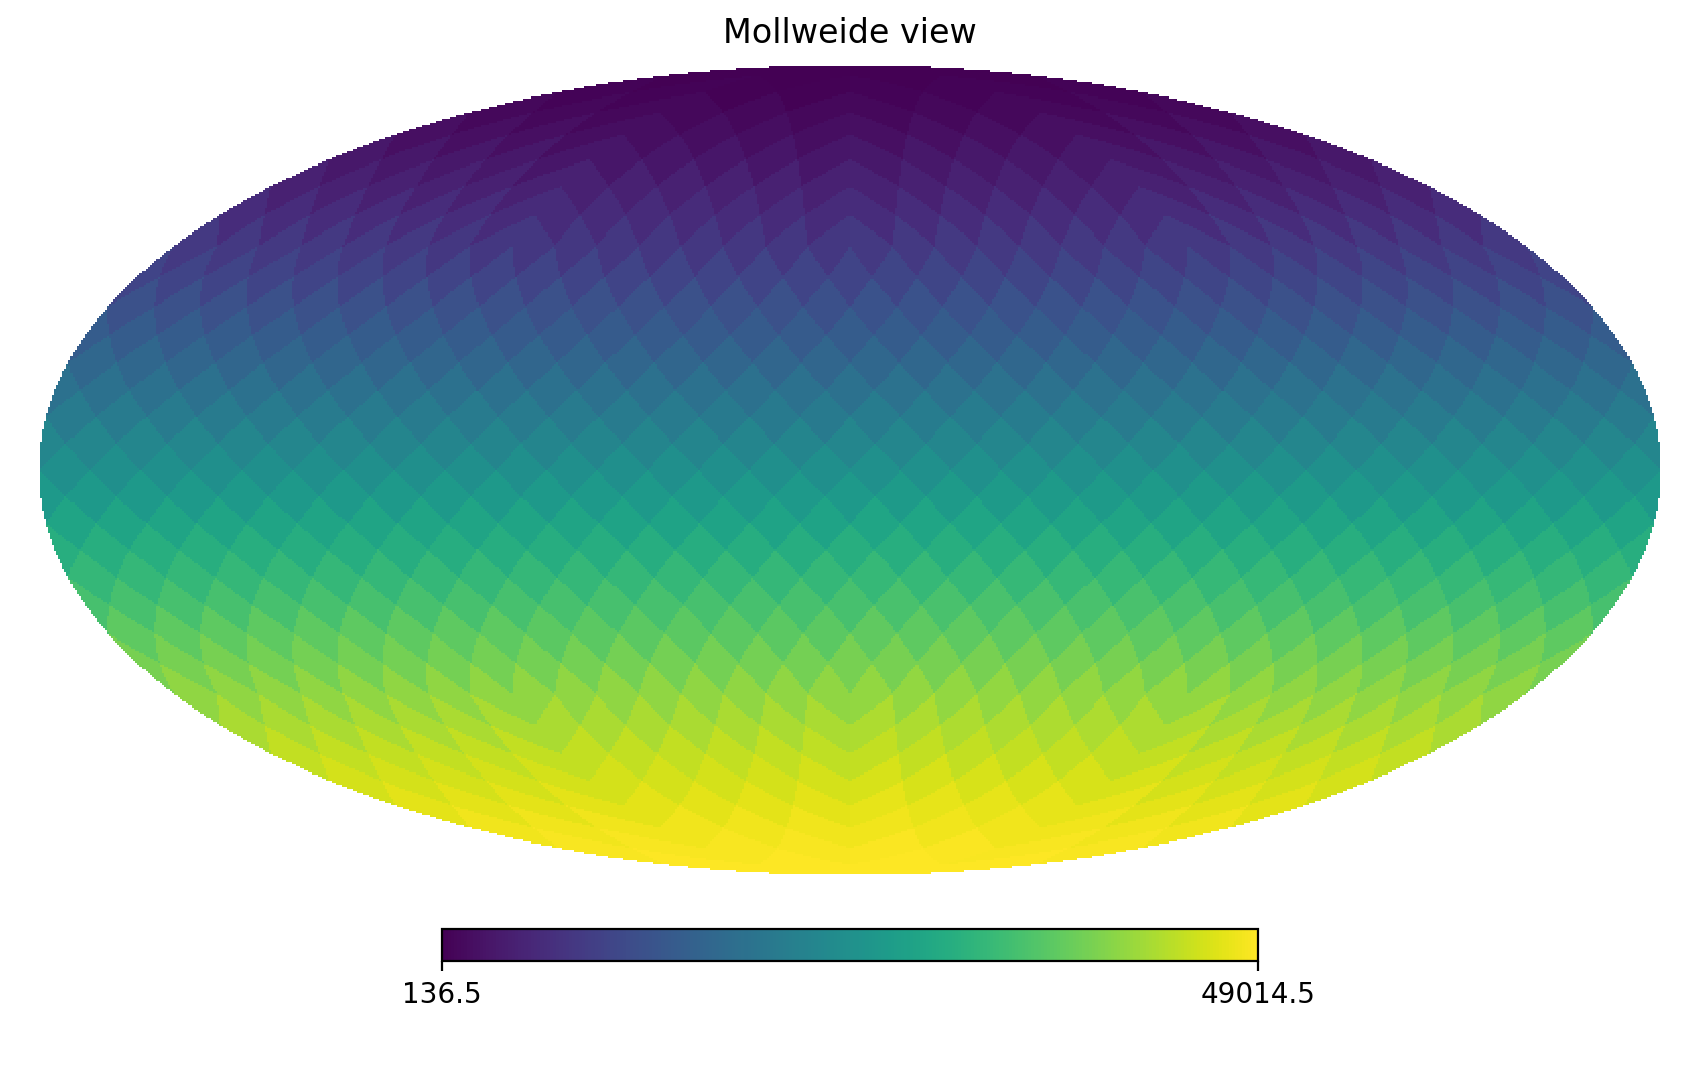

In [11]:
out = model.predict(mtensor)
out = out.reshape(hp.nside2npix(8))
hp.mollview(out)

# MaxPooling

In [12]:
mtensor = m.reshape(1, len(m), 1)
shape = (len(m), 1)
inputs = keras.layers.Input(shape)
x = nnhealpix.layers.blocks.MaxPooling(Nside, 8)(inputs)
model = keras.models.Model(inputs=inputs, outputs=x)
model.compile(loss=keras.losses.mse,
              optimizer=keras.optimizers.SGD(lr=0.01))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 49152, 1)          0         
_________________________________________________________________
order_map_4 (OrderMap)       (None, 49152, 1)          0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 768, 1)            0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


<IPython.core.display.Javascript object>


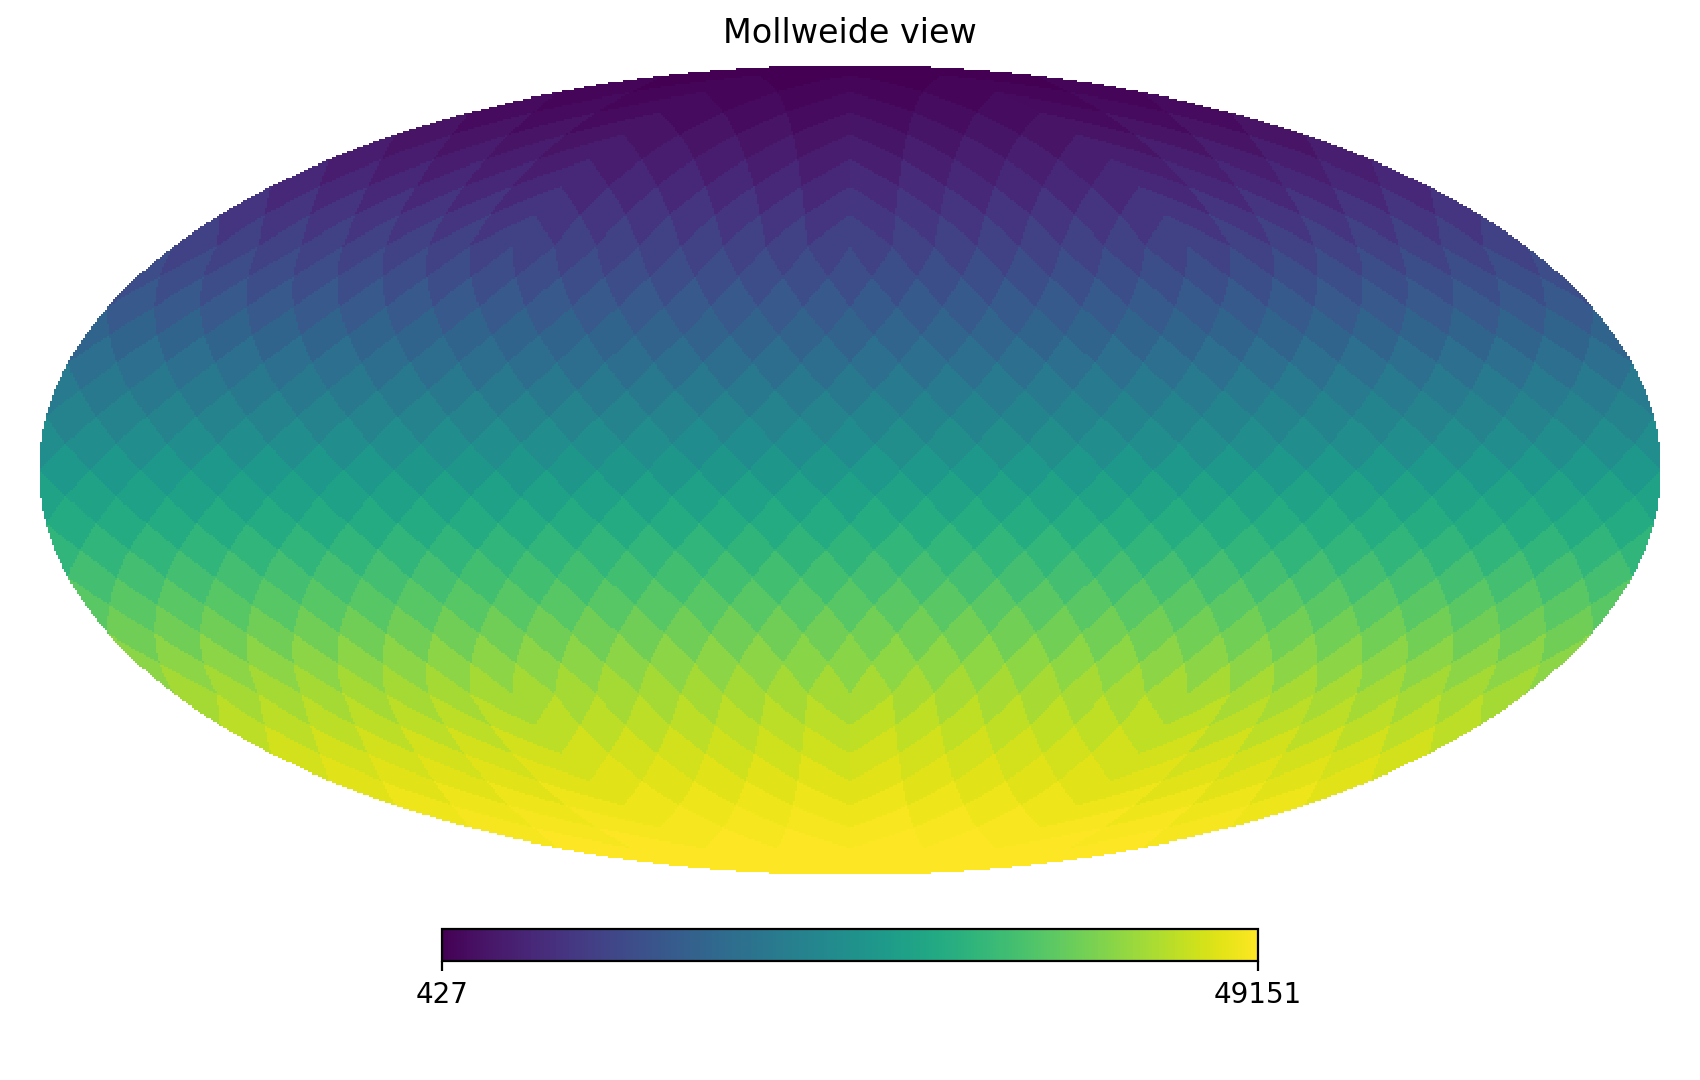

In [13]:
out = model.predict(mtensor)
out = out.reshape(hp.nside2npix(8))
hp.mollview(out)

# ConvPixel

In [14]:
mtensor = m.reshape(1, len(m), 1)
shape = (len(m), 1)
inputs = keras.layers.Input(shape)
x = nnhealpix.layers.blocks.ConvPixel(Nside, 8, filters=1)(inputs)
model = keras.models.Model(inputs=inputs, outputs=x)
model.compile(loss=keras.losses.mse,
              optimizer=keras.optimizers.SGD(lr=0.01))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 49152, 1)          0         
_________________________________________________________________
order_map_5 (OrderMap)       (None, 49152, 1)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 768, 1)            64        
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


   # ConvNeighbours and ResidualCNN

In [20]:
mtensor = m.reshape(1, len(m), 1)
shape = (len(m), 1)
print(mtensor.shape, shape)
inputs = keras.layers.Input(shape)
x = nnhealpix.layers.blocks.ConvNeighbours(Nside, filters=32, kernel_size=9)(inputs)
model = keras.models.Model(inputs=inputs, outputs=x)
model.compile(loss=keras.losses.mse,
              optimizer=keras.optimizers.SGD(lr=0.01))
model.summary()
out = model.predict(mtensor)

(1, 49152, 1) (49152, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 49152, 1)          0         
_________________________________________________________________
order_map_10 (OrderMap)      (None, 442368, 1)         0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 49152, 32)         288       
Total params: 288
Trainable params: 288
Non-trainable params: 0
_________________________________________________________________


In [14]:
mtensor = m.reshape(1, len(m), 1)
shape = (len(m), 1)
inputs = keras.layers.Input(shape)
x = nnhealpix.layers.blocks.ResConvNeighbours(Nside, filters=1, kernel_size=9)(inputs)
model = keras.models.Model(inputs=inputs, outputs=x)
model.compile(loss=keras.losses.mse,
              optimizer=keras.optimizers.SGD(lr=0.01))
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 12288, 1)     0                                            
__________________________________________________________________________________________________
order_map_8 (OrderMap)          (None, 110592, 1)    0           input_7[0][0]                    
__________________________________________________________________________________________________
conv1d_7 (Conv1D)               (None, 12288, 1)     9           order_map_8[0][0]                
__________________________________________________________________________________________________
batch_normalization_3 (BatchNor (None, 12288, 1)     49152       conv1d_7[0][0]                   
__________________________________________________________________________________________________
activation